<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Tarefa_11_Poluicao_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Using TensorFlow backend.


In [0]:
base = pd.read_csv('/content/sample_data/Poluicao.csv')
base = base.dropna()
base = base.drop('No', axis = 1)
base = base.drop('year', axis = 1)
base = base.drop('month', axis = 1)
base = base.drop('day', axis = 1)
base = base.drop('hour', axis = 1)
base = base.drop('cbwd', axis = 1)
base_treinamento = base.iloc[:, 0:7].values
normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [0]:
previsores = []
valor_poluicao = []
X_teste = []
for i in range(90, len(base_treinamento_normalizada)):
  previsores.append(base_treinamento_normalizada[i - 90: i, 0: 7])
  valor_poluicao.append(base_treinamento_normalizada[i, 0])
previsores, valor_poluicao = np.array(previsores), np.array(valor_poluicao)

In [4]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], previsores.shape[2])))#return_sequences passa a informacao para as proxima camada LSTM
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])#testando com adam porem é possivel usar o rmsprop





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [5]:
regressor.fit(previsores, valor_poluicao, epochs = 2, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2





41557/41557 [==============================] - 418s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0335
Epoch 2/2
41557/41557 [==============================] - 416s 10ms/step - loss: 0.0010 - mean_absolute_error: 0.0215


In [0]:
base_teste = pd.read_csv('/content/sample_data/Teste.csv')
base_teste = base_teste.dropna()
base_teste = base_teste.drop('No', axis = 1)
base_teste = base_teste.drop('year', axis = 1)
base_teste = base_teste.drop('month', axis = 1)
base_teste = base_teste.drop('day', axis = 1)
base_teste = base_teste.drop('hour', axis = 1)
base_teste = base_teste.drop('cbwd', axis = 1)
poluicao_real = base_teste.iloc[:, 0:1].values

frames = [base, base_teste]
base_completa = pd.concat(frames)
entradas = base_completa[len(base_completa) - len(base_teste)- 90:].values
entradas = normalizador.transform(entradas)

In [7]:
print(previsores.shape)
for i in range(90, len(entradas)):
  X_teste.append(entradas[i-90: i, 0:7])
X_teste = np.array(X_teste)
print(X_teste.shape)
previsores = regressor.predict(X_teste)
normalizador_previsor = MinMaxScaler(feature_range = (0, 1))
normalizador_previsor.fit_transform(base_treinamento[:,0: 1])
previsores = normalizador_previsor.inverse_transform(previsores)# desnormaliza os dados

(41557, 90, 7)
(110, 90, 7)


In [10]:
for i in range(len(previsores)):
  print(previsores[i], poluicao_real[i])
print("Diferença Media: " , ((previsores.mean() - poluicao_real.mean())**2)**1/2)

[168.69621] [185]
[177.6505] [191]
[178.46573] [194]
[181.62434] [194]
[185.90501] [192]
[182.94333] [208]
[200.53185] [224]
[216.74768] [249]
[240.19684] [317]
[304.95816] [328]
[311.3772] [349]
[335.55176] [327]
[306.54752] [348]
[334.9253] [363]
[341.95245] [385]
[364.43127] [393]
[365.76846] [388]
[359.153] [444]
[423.07672] [334]
[288.25433] [284]
[265.9135] [264]
[249.37804] [221]
[211.48901] [160]
[160.1286] [160]
[158.60518] [92]
[93.22593] [59]
[64.67829] [69]
[72.71796] [48]
[57.912304] [32]
[45.05806] [33]
[45.246346] [45]
[55.19016] [42]
[55.406902] [41]
[54.005054] [110]
[106.04252] [175]
[169.32628] [293]
[279.50464] [324]
[305.58252] [341]
[324.17447] [362]
[345.79376] [372]
[351.89407] [373]
[348.69] [372]
[348.1257] [318]
[292.64377] [188]
[177.83205] [171]
[167.72015] [136]
[138.06317] [124]
[126.73091] [141]
[138.34134] [132]
[126.36879] [134]
[128.4867] [56]
[64.94856] [48]
[54.954712] [27]
[40.29853] [28]
[40.29526] [20]
[34.13721] [22]
[34.97553] [120]
[112.2893] 

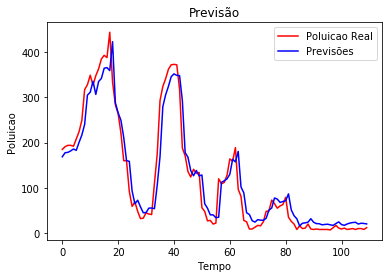

In [11]:
plt.plot(poluicao_real, color = 'red', label = 'Poluicao Real')
plt.plot(previsores, color = 'blue', label = 'Previsões')
plt.title('Previsão')
plt.xlabel('Tempo')
plt.ylabel('Poluicao')
plt.legend()
plt.show()